In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../DATA/cement_slump.csv')

In [4]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


In [5]:
pd.DataFrame(df.corr()['Compressive Strength (28-day)(Mpa)'])

,Compressive Strength (28-day)(Mpa)
Cement,0.445656
Slag,-0.331522
Fly ash,0.444380
Water,-0.254320
SP,-0.037909
Coarse Aggr.,-0.160610
Fine Aggr.,-0.154532
SLUMP(cm),-0.223499
FLOW(cm),-0.124189
Compressive Strength (28-day)(Mpa),1.000000


<Axes: >

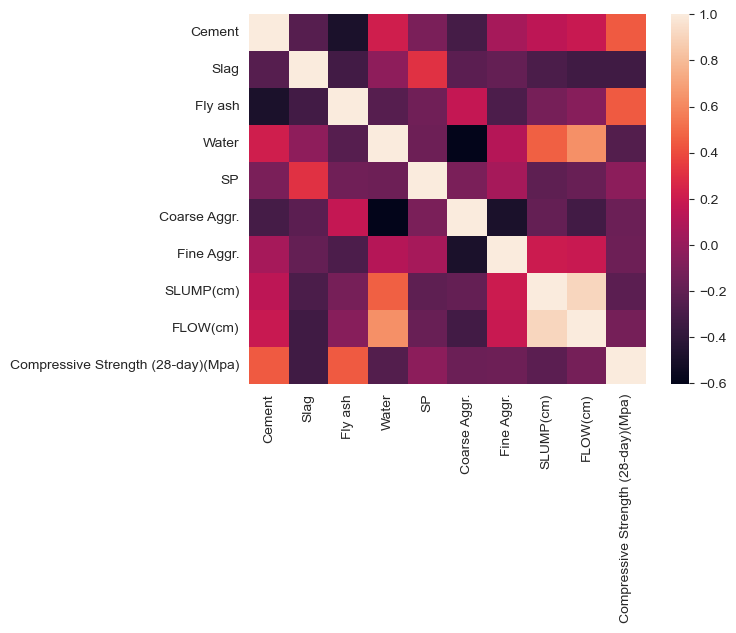

In [6]:
sns.heatmap(df.corr())

In [7]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [9]:
y = df['Compressive Strength (28-day)(Mpa)']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [35]:
scaled_X_test = scaler.transform(X_test)

In [36]:
scaled_X_train = scaler.fit_transform(X_train)

In [37]:
from sklearn.svm import SVR, LinearSVR

In [38]:
base_model = SVR()

In [39]:
base_model.fit(scaler_X_train, y_train)

SVR()

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
base_preds = base_model.predict(scaled_X_test)

In [42]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [43]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327134

In [44]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
svr = SVR()

In [48]:
grid_model = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    n_jobs=-1
)

In [49]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [51]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [55]:
grid_preds = grid_model.predict(scaled_X_test)

In [56]:
mean_absolute_error(y_test,grid_preds)

2.512801221076172

In [57]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.178210305119806